#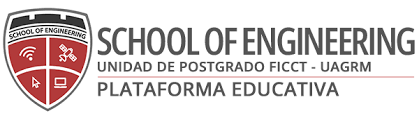

**Maestría en Ciencia de Datos e Inteligencia Artificial V1E4**
##MÓDULO 5 - Análisis Estadístico de Datos
## Selección de modelos - Validación cruzada

**Universidad Autónoma Gabriel René Moreno de Santa Cruz de la Sierra-Bolivia UAGRM - POSTGRADO**<br/>

In [ ]:
# Import necessary libraries
%matplotlib inline
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


### 1. Leer el dataset

In [ ]:
# Read the file "dataset.csv" as a Pandas dataframe
df = pd.read_csv("/content/dataset1.csv")

# Eche un vistazo rápido al conjunto de datos
df.head()


,x1,y1
0,0.265960,1.624972
1,0.516805,2.734012
2,0.658542,4.628908
3,1.678052,5.186455
4,2.112463,8.395088


In [ ]:
# Asigne los valores de las columnas x e y a la
# variables predictoras y de respuesta
x = df[["x1"]].values
y = df.y1.values


### 2. Dividir en Train-validation sets

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y validación con un conjunto de entrenamiento del 75 %
# Establecer estado_aleatorio=1
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=2025) #ir cambiando


### 3. Realizar la validacion cruzada con 4 pliegues con un polinomio de primer grado

In [ ]:
### codigo aca

x_poly = PolynomialFeatures(degree =1).fit_transform(x)
lreg = LinearRegression(fit_intercept=False)
# obtener el error de validacion cruzada
mse_cv = cross_validate(lreg, x_poly,y, cv =4, scoring= "neg_mean_squared_error",return_train_score=True)

In [ ]:
mse_cv #Diccionario

{'fit_time': array([0.00203514, 0.00216198, 0.00100756, 0.00126886]),
 'score_time': array([0.00101829, 0.0009501 , 0.00088263, 0.00110269]),
 'test_score': array([-229.16475243,  -49.4446576 ,  -31.27591997, -152.14280128]),
 'train_score': array([ -7.64589276, -17.40635119, -21.86349853,  -9.06722725])}

#### 3.1 Analizar la variable de validacion cruzada


In [ ]:
### Encontrar el error promedio de validacion cruzada
-1*np.mean(mse_cv["test_score"])

np.float64(115.5070328193026)

### 4. Encontrar el  MSE para polinomios de grado variable

In [ ]:
# Seleccionar el grado maximo a iterar
maxdeg = 15
training_error = []
validation_error = []
cross_validation_error = []
for d in range(maxdeg):
    # calculo de los polynomial features
    x_poly = PolynomialFeatures(degree=d).fit_transform(x)

    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_val   = PolynomialFeatures(degree=d).fit_transform(x_val)
    # Inicializar el modelo de regresion sin utilizar el intercept
    lreg = LinearRegression(fit_intercept=False)
    # Ajustar el modelo en los datos de entrenamiento
    lreg.fit(x_poly_train,y_train)

    # Utilizar el modelo entrenado para predecir en los datos transformados del train set
    y_train_pred = lreg.predict(x_poly_train)

    # Utilizar el modelo entrenado para predecir en los datos transformados del validation set
    y_val_pred   = lreg.predict(x_poly_val)

    # Calcular el error en base a los datos en y_train_pred y y_val_pred
    training_error.append(mean_squared_error(y_train,y_train_pred))
    validation_error.append(mean_squared_error(y_val,y_val_pred))

    # realizar cross validation
    mse_score = cross_validate(lreg,x_poly,y,cv =10, scoring="neg_mean_squared_error")
    error_val_cv = -1*np.mean(mse_score["test_score"])
    cross_validation_error.append(error_val_cv)

#### 4.1 Encontrar el grado optimo del polinomio

In [ ]:
min_mse = min(validation_error)
grado_optimo_val = validation_error.index(min_mse)
# Para el set de cross-validacion
min_mse_cv = min(cross_validation_error)
grado_optimo_cv = cross_validation_error.index(min_mse_cv)
# comentarios
print("El grado optimo con un solo set de validacion es: ",grado_optimo_val)
print("El grado optimo con validacion cruzada es: ",grado_optimo_cv)

El grado optimo con un solo set de validacion es:  4
El grado optimo con validacion cruzada es:  3


#### 4.2 Graficar los errores obtenidos

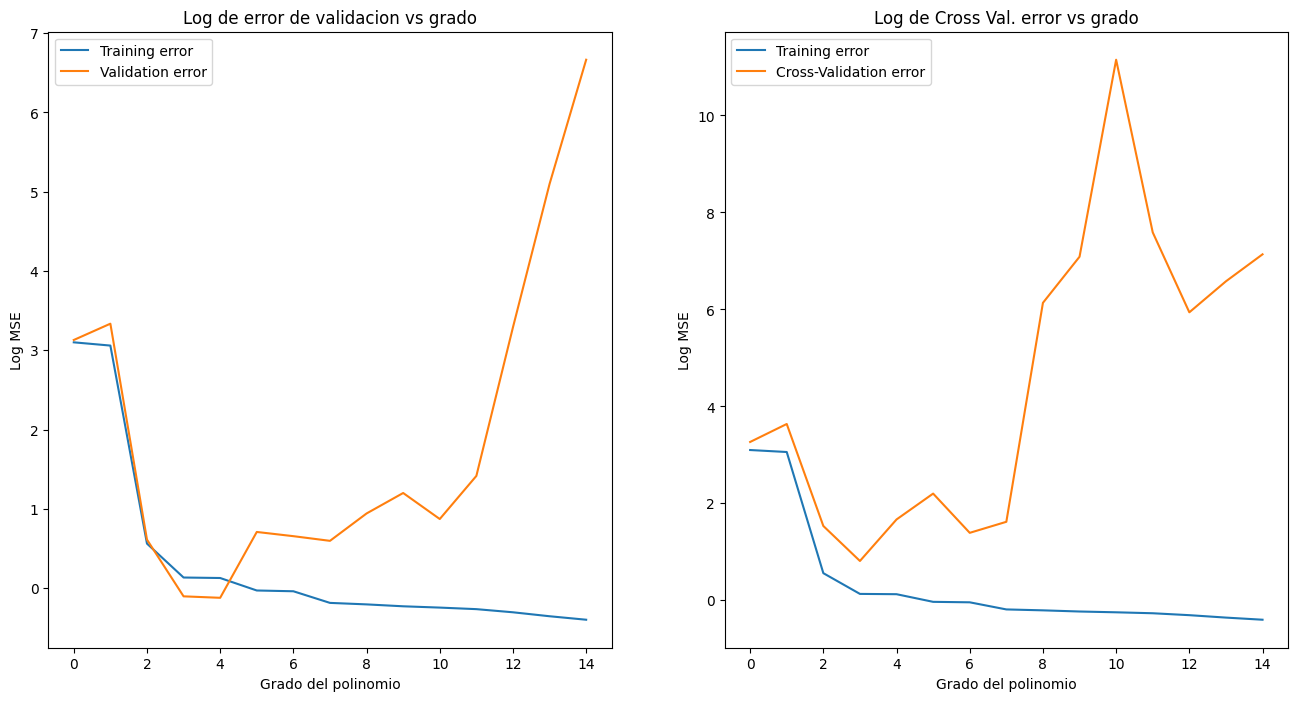

In [ ]:

fig,ax = plt.subplots(1,2,figsize=(16,8))

# Graficar el error del training set con etiquetas
ax[0].plot(range(maxdeg),np.log(training_error),label="Training error")
# Graficar el error del validation set con etiquetas
ax[0].plot(range(maxdeg),np.log(validation_error),label="Validation error")

# Graficar el error del training set con etiquetas
ax[1].plot(range(maxdeg),np.log(training_error),label="Training error")
# Graficar el error del validation set con etiquetas
ax[1].plot(range(maxdeg),np.log(cross_validation_error),label="Cross-Validation error")


# agregar etiquetas a los ejes:
ax[0].set_xlabel("Grado del polinomio")
ax[0].set_ylabel("Log MSE")
ax[0].set_title("Log de error de validacion vs grado")
ax[0].legend(loc='best')

# agregar etiquetas a los ejes:
ax[1].set_xlabel("Grado del polinomio")
ax[1].set_ylabel("Log MSE")
ax[1].set_title("Log de Cross Val. error vs grado")
ax[1].legend(loc='best')

plt.show()

⏸ Si ejecutas el ejercicio con un estado aleatorio de 0, ¿notas algún cambio? ¿Qué conclusión puedes sacar de este experimento?


In [ ]:

#answer1 = '0 - 1- 1000 etc. se mantiene el de validación cruzada'


- Con el estado aleatorio =0:
  - grado optimo con un solo set de validacion = 3
  - grado optimo con validacion cruzada = 3
- Con el estado aleatorio =1:
  - grado optimo con un solo set de validacion = 8
  - grado optimo con validacion cruzada = 3

### 5. Analisis para otro dataset

Repetir los pasos anteriores $1,2,4$ para el `dataset2.csv`


Anotar sus observaciones